In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# 데이터 로드
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

In [3]:
# 데이터 로드 확인
print(df_train.head())
print("-------------------------------------------------------------------------------")
print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

In [4]:
# Name 분류
df_train["Name"] = df_train["Name"].str.extract(' ([a-zA-Z]+)\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ku927\AppData\Local\Temp\ipykernel_4712\4272965837.py:2: SyntaxWarning: invalid escape sequence '\.'
  df_train["Name"] = df_train["Name"].str.extract(' ([a-zA-Z]+)\.', expand=False)


In [5]:
# Age 결측치 Name 분포
df_train1 = df_train[df_train.Age.isna()]
df_train1["Name"].value_counts()

Name
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [6]:
# Age 비결측치 Name 분포
df_train2 = df_train[df_train.Age.notna()]
df_Mr = df_train2[df_train2["Name"] == "Mr"]
df_Miss = df_train2[df_train2["Name"] == "Miss"]
df_Mrs = df_train2[df_train2["Name"] == "Mrs"]
df_Master = df_train2[df_train2["Name"] == "Master"]
df_Dr = df_train2[df_train2["Name"] == "Dr"]
df_train2["Name"].value_counts()

Name
Mr          398
Miss        146
Mrs         108
Master       36
Rev           6
Dr            6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

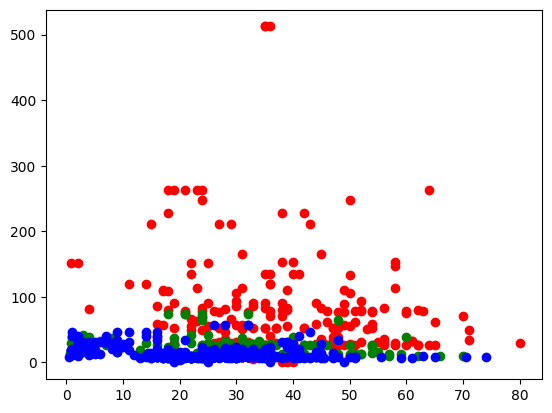

In [7]:
df_pclass1 = df_train[df_train["Pclass"] == 1]
df_pclass2 = df_train[df_train["Pclass"] == 2]
df_pclass3 = df_train[df_train["Pclass"] == 3]

x1 = df_pclass1["Age"]
y1 = df_pclass1["Fare"]

x2 = df_pclass2["Age"]
y2 = df_pclass2["Fare"]

x3 = df_pclass3["Age"]
y3 = df_pclass3["Fare"]

plt.scatter(x1, y1, color = "r")
plt.scatter(x2, y2, color = "g")
plt.scatter(x3, y3, color = "b")

In [8]:
# Name별 Age 평균
print(df_Mr["Age"].mean())
print(df_Miss["Age"].mean())
print(df_Mrs["Age"].mean())
print(df_Master["Age"].mean())
print(df_Dr["Age"].mean())

32.368090452261306
21.773972602739725
35.898148148148145
4.574166666666667
42.0


In [9]:
# Name별 Pclass 분류
df_Mr_pc1 = df_Mr[df_Mr["Pclass"] == 1]
df_Mr_pc2 = df_Mr[df_Mr["Pclass"] == 2]
df_Mr_pc3 = df_Mr[df_Mr["Pclass"] == 3]

df_Miss_pc1 = df_Miss[df_Miss["Pclass"] == 1]
df_Miss_pc2 = df_Miss[df_Miss["Pclass"] == 2]
df_Miss_pc3 = df_Miss[df_Miss["Pclass"] == 3]

df_Mrs_pc1 = df_Mrs[df_Mrs["Pclass"] == 1]
df_Mrs_pc2 = df_Mrs[df_Mrs["Pclass"] == 2]
df_Mrs_pc3 = df_Mrs[df_Mrs["Pclass"] == 3]

df_Master_pc1 = df_Master[df_Master["Pclass"] == 1]
df_Master_pc2 = df_Master[df_Master["Pclass"] == 2]
df_Master_pc3 = df_Master[df_Master["Pclass"] == 3]

# df_Dr_pc1 = df_Mr[df_Dr["Pclass"] == 1]
# df_Dr_pc2 = df_Mr[df_Dr["Pclass"] == 2]
# df_Dr_pc3 = df_Mr[df_Dr["Pclass"] == 3]

In [10]:
# Name 및 Pclass 별 Age 평균
print("<Mr>")
print("--Pclass1--")
print(df_Mr_pc1["Age"].mean())
print("--Pclass2--")
print(df_Mr_pc2["Age"].mean())
print("--Pclass3--")
print(df_Mr_pc3["Age"].mean())

print("\n")

print("<Miss>")
print("--Pclass1--")
print(df_Miss_pc1["Age"].mean())
print("--Pclass2--")
print(df_Miss_pc2["Age"].mean())
print("--Pclass3--")
print(df_Miss_pc3["Age"].mean())

print("\n")

print("<Mrs>")
print("--Pclass1--")
print(df_Mrs_pc1["Age"].mean())
print("--Pclass2--")
print(df_Mrs_pc2["Age"].mean())
print("--Pclass3--")
print(df_Mrs_pc3["Age"].mean())

print("\n")

print("<Master>")
print("--Pclass1--")
print(df_Master_pc1["Age"].mean())
print("--Pclass2--")
print(df_Master_pc2["Age"].mean())
print("--Pclass3--")
print(df_Master_pc3["Age"].mean())

<Mr>
--Pclass1--
41.58045977011494
--Pclass2--
32.76829268292683
--Pclass3--
28.724890829694324


<Miss>
--Pclass1--
30.0
--Pclass2--
22.390625
--Pclass3--
16.1231884057971


<Mrs>
--Pclass1--
40.88235294117647
--Pclass2--
33.68292682926829
--Pclass3--
33.515151515151516


<Master>
--Pclass1--
5.306666666666667
--Pclass2--
2.2588888888888885
--Pclass3--
5.350833333333334


In [11]:
# Age 결측치 처리
# Mr
df_train.loc[(df_train["Name"] == "Mr") & (df_train["Pclass"] == 1) & (df_train["Age"].isnull()), "Age"] = df_Mr_pc1["Age"].mean()
df_train.loc[(df_train["Name"] == "Mr") & (df_train["Pclass"] == 2) & (df_train["Age"].isnull()), "Age"] = df_Mr_pc2["Age"].mean()
df_train.loc[(df_train["Name"] == "Mr") & (df_train["Pclass"] == 3) & (df_train["Age"].isnull()), "Age"] = df_Mr_pc3["Age"].mean()

# Miss
df_train.loc[(df_train["Name"] == "Miss") & (df_train["Pclass"] == 1) & (df_train["Age"].isnull()), "Age"] = df_Miss_pc1["Age"].mean()
df_train.loc[(df_train["Name"] == "Miss") & (df_train["Pclass"] == 2) & (df_train["Age"].isnull()), "Age"] = df_Miss_pc2["Age"].mean()
df_train.loc[(df_train["Name"] == "Miss") & (df_train["Pclass"] == 3) & (df_train["Age"].isnull()), "Age"] = df_Miss_pc3["Age"].mean()

# Mrs
df_train.loc[(df_train["Name"] == "Mrs") & (df_train["Pclass"] == 1) & (df_train["Age"].isnull()), "Age"] = df_Mrs_pc1["Age"].mean()
df_train.loc[(df_train["Name"] == "Mrs") & (df_train["Pclass"] == 2) & (df_train["Age"].isnull()), "Age"] = df_Mrs_pc2["Age"].mean()
df_train.loc[(df_train["Name"] == "Mrs") & (df_train["Pclass"] == 3) & (df_train["Age"].isnull()), "Age"] = df_Mrs_pc3["Age"].mean()

# Master
df_train.loc[(df_train["Name"] == "Master") & (df_train["Pclass"] == 1) & (df_train["Age"].isnull()), "Age"] = df_Master_pc1["Age"].mean()
df_train.loc[(df_train["Name"] == "Master") & (df_train["Pclass"] == 2) & (df_train["Age"].isnull()), "Age"] = df_Master_pc2["Age"].mean()
df_train.loc[(df_train["Name"] == "Master") & (df_train["Pclass"] == 3) & (df_train["Age"].isnull()), "Age"] = df_Master_pc3["Age"].mean()

# Dr
df_train.loc[(df_train["Name"] == "Dr") & (df_train["Age"].isnull()), "Age"] = df_Dr["Age"].mean()

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Cabin 결측치 처리
df_train["Cabin"] = df_train["Cabin"].fillna("0")
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [13]:
# Embarked 결측치 처리
df_train["Embarked"] = df_train["Embarked"].fillna("S")
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
# test 데이터셋 결측치 처리
# Name 호칭으로 변경
df_test["Name"] = df_test["Name"].str.extract(' ([a-zA-Z]+)\.', expand=False)

# 호칭에 따른 df
df_test2 = df_test[df_test.Age.notna()]
df_Mr = df_test2[df_test2["Name"] == "Mr"]
df_Miss = df_test2[df_test2["Name"] == "Miss"]
df_Mrs = df_test2[df_test2["Name"] == "Mrs"]
df_Master = df_test2[df_test2["Name"] == "Master"]
df_Dr = df_test2[df_test2["Name"] == "Dr"]

# 클래스에 따른 df
df_Mr_pc1 = df_Mr[df_Mr["Pclass"] == 1]
df_Mr_pc2 = df_Mr[df_Mr["Pclass"] == 2]
df_Mr_pc3 = df_Mr[df_Mr["Pclass"] == 3]

df_Miss_pc1 = df_Miss[df_Miss["Pclass"] == 1]
df_Miss_pc2 = df_Miss[df_Miss["Pclass"] == 2]
df_Miss_pc3 = df_Miss[df_Miss["Pclass"] == 3]

df_Mrs_pc1 = df_Mrs[df_Mrs["Pclass"] == 1]
df_Mrs_pc2 = df_Mrs[df_Mrs["Pclass"] == 2]
df_Mrs_pc3 = df_Mrs[df_Mrs["Pclass"] == 3]

df_Master_pc1 = df_Master[df_Master["Pclass"] == 1]
df_Master_pc2 = df_Master[df_Master["Pclass"] == 2]
df_Master_pc3 = df_Master[df_Master["Pclass"] == 3]

# Age
# Mr
df_test.loc[(df_test["Name"] == "Mr") & (df_test["Pclass"] == 1) & (df_test["Age"].isnull()), "Age"] = df_Mr_pc1["Age"].mean()
df_test.loc[(df_test["Name"] == "Mr") & (df_test["Pclass"] == 2) & (df_test["Age"].isnull()), "Age"] = df_Mr_pc2["Age"].mean()
df_test.loc[(df_test["Name"] == "Mr") & (df_test["Pclass"] == 3) & (df_test["Age"].isnull()), "Age"] = df_Mr_pc3["Age"].mean()

# Miss
df_test.loc[(df_test["Name"] == "Miss") & (df_test["Pclass"] == 1) & (df_test["Age"].isnull()), "Age"] = df_Miss_pc1["Age"].mean()
df_test.loc[(df_test["Name"] == "Miss") & (df_test["Pclass"] == 2) & (df_test["Age"].isnull()), "Age"] = df_Miss_pc2["Age"].mean()
df_test.loc[(df_test["Name"] == "Miss") & (df_test["Pclass"] == 3) & (df_test["Age"].isnull()), "Age"] = df_Miss_pc3["Age"].mean()

# Mrs
df_test.loc[(df_test["Name"] == "Mrs") & (df_test["Pclass"] == 1) & (df_test["Age"].isnull()), "Age"] = df_Mrs_pc1["Age"].mean()
df_test.loc[(df_test["Name"] == "Mrs") & (df_test["Pclass"] == 2) & (df_test["Age"].isnull()), "Age"] = df_Mrs_pc2["Age"].mean()
df_test.loc[(df_test["Name"] == "Mrs") & (df_test["Pclass"] == 3) & (df_test["Age"].isnull()), "Age"] = df_Mrs_pc3["Age"].mean()

# Master
df_test.loc[(df_test["Name"] == "Master") & (df_test["Pclass"] == 1) & (df_test["Age"].isnull()), "Age"] = df_Master_pc1["Age"].mean()
df_test.loc[(df_test["Name"] == "Master") & (df_test["Pclass"] == 2) & (df_test["Age"].isnull()), "Age"] = df_Master_pc2["Age"].mean()
df_test.loc[(df_test["Name"] == "Master") & (df_test["Pclass"] == 3) & (df_test["Age"].isnull()), "Age"] = df_Master_pc3["Age"].mean()

# Ms
df_test.loc[(df_test["Name"] == "Ms") & (df_test["Pclass"] == 3) & (df_test["Age"].isnull()), "Age"] = df_Mrs_pc3["Age"].mean()

# Dr
df_test.loc[(df_train["Name"] == "Dr") & (df_test["Age"].isnull()), "Age"] = df_Dr["Age"].mean()

# Cabin
df_test["Cabin"] = df_test["Cabin"].fillna("0")

# Embarked
df_test["Embarked"] = df_test["Embarked"].fillna("S")

# Fare
df_FareNn = df_test[df_test.Fare.notna()]
df_Fare = df_FareNn[df_FareNn["Pclass"] == 3]
df_test["Fare"] = df_test["Fare"].fillna(df_Fare["Fare"].mean())


df_test.isnull().sum()

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ku927\AppData\Local\Temp\ipykernel_4712\1972180076.py:3: SyntaxWarning: invalid escape sequence '\.'
  df_test["Name"] = df_test["Name"].str.extract(' ([a-zA-Z]+)\.', expand=False)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
# Sex 인코딩
df_train.loc[df_train['Sex']=='male', 'Sex']=0
df_train.loc[df_train['Sex']=='female','Sex']=1
df_test.loc[df_test['Sex']=='male','Sex']=0
df_test.loc[df_test['Sex']=='female','Sex']=1

In [16]:
# family
df_train["Family"] = df_train["Parch"] + df_train["SibSp"]
df_test["Family"] = df_test["Parch"] + df_test["SibSp"]

In [17]:
# 표준화
train_X_num = df_train[['Age', 'Family']]
test_X_num = df_test[['Age', 'Family']]

standard_scaler = StandardScaler()

train_standard = standard_scaler.fit_transform(train_X_num)
train_standard = pd.DataFrame(train_standard, 
                              index=train_X_num.index, 
                              columns=train_X_num.columns)

test_standard = standard_scaler.fit_transform(test_X_num)
test_standard = pd.DataFrame(test_standard, 
                              index=test_X_num.index, 
                              columns=test_X_num.columns)

df_train["Age"] = train_standard["Age"]
df_train["Family"] = train_standard["Family"]
df_test["Age"] = test_standard["Age"]
df_test["Family"] = test_standard["Family"]

In [18]:
# 호칭 정리
df_train['Name'] = df_train['Name'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Dona'], 'Other')
df_test['Name'] = df_test['Name'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Dona'], 'Other')
df_train["Name"].value_counts()

Name
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [19]:
# Name 인코딩
df_test['Name'] = df_test['Name'].astype('category').cat.codes
df_train['Name'] = df_train['Name'].astype('category').cat.codes

df_train.head()
df_train["Name"].value_counts()

Name
2    517
1    182
3    125
0     40
4     27
Name: count, dtype: int64

In [20]:
# Embarked 인코딩
df_test['Embarked'] = df_test['Embarked'].astype('category').cat.codes
df_train['Embarked'] = df_train['Embarked'].astype('category').cat.codes
df_train["Embarked"].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [21]:
# 파일저장
df_train.to_csv("./preprocessed_dataset/train.csv")
df_test.to_csv("./preprocessed_dataset/test.csv")